# 10 minutes to Koalas

This is a short introduction to Koalas, geared mainly for new users. This notebook shows you some key differences between pandas and Koalas. You can run this examples by yourself on a live notebook [here](https://mybinder.org/v2/gh/databricks/koalas/master?filepath=docs%2Fsource%2Fgetting_started%2F10min.ipynb).

Customarily, we import Koalas as follows:

In [1]:
import pandas as pd
import numpy as np
import databricks.koalas as ks
from pyspark.sql import SparkSession

## Object Creation



Creating a Koalas Series by passing a list of values, letting Koalas create a default integer index:

In [2]:
s = ks.Series([1, 3, 5, np.nan, 6, 8])

In [3]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
Name: 0, dtype: float64

Creating a Koalas DataFrame by passing a dict of objects that can be converted to series-like.

In [4]:
kdf = ks.DataFrame(
    {'a': [1, 2, 3, 4, 5, 6],
     'b': [100, 200, 300, 400, 500, 600],
     'c': ["one", "two", "three", "four", "five", "six"]},
    index=[10, 20, 30, 40, 50, 60])

In [5]:
kdf

,a,b,c
10,1,100,one
20,2,200,two
30,3,300,three
40,4,400,four
50,5,500,five
60,6,600,six


Creating a pandas DataFrame by passing a numpy array, with a datetime index and labeled columns:

In [6]:
dates = pd.date_range('20130101', periods=6)

In [7]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [8]:
pdf = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))

In [9]:
pdf

,A,B,C,D
2013-01-01,-0.407291,0.066551,-0.073149,0.648219
2013-01-02,-0.848735,0.437277,0.632657,0.312861
2013-01-03,-0.415537,-1.787072,0.242221,0.125543
2013-01-04,-1.637271,1.134810,0.282532,0.133995
2013-01-05,-1.230477,-1.925734,0.736288,-0.547677
2013-01-06,1.092894,-1.071281,0.318752,-0.477591


Now, this pandas DataFrame can be converted to a Koalas DataFrame

In [10]:
kdf = ks.from_pandas(pdf)

In [11]:
type(kdf)

databricks.koalas.frame.DataFrame

It looks and behaves the same as a pandas DataFrame though

In [12]:
kdf

,A,B,C,D
2013-01-01,-0.407291,0.066551,-0.073149,0.648219
2013-01-02,-0.848735,0.437277,0.632657,0.312861
2013-01-03,-0.415537,-1.787072,0.242221,0.125543
2013-01-04,-1.637271,1.134810,0.282532,0.133995
2013-01-05,-1.230477,-1.925734,0.736288,-0.547677
2013-01-06,1.092894,-1.071281,0.318752,-0.477591


Also, it is possible to create a Koalas DataFrame from Spark DataFrame.  

Creating a Spark DataFrame from pandas DataFrame

In [13]:
spark = SparkSession.builder.getOrCreate()

In [14]:
sdf = spark.createDataFrame(pdf)

In [15]:
sdf.show()

+--------------------+-------------------+--------------------+-------------------+
|                   A|                  B|                   C|                  D|
+--------------------+-------------------+--------------------+-------------------+
|-0.40729126067930577|0.06655086061836445|-0.07314878758440578| 0.6482187447085683|
|  -0.848735274668907|0.43727685786558224|  0.6326566086816865|  0.312860815784838|
|-0.41553692955141575|-1.7870717259038067| 0.24222142308402184|  0.125543462922973|
|  -1.637270523583917| 1.1348099198020765|  0.2825324338895592|0.13399483028402598|
| -1.2304766522352943|-1.9257342346663335|  0.7362879432261002|-0.5476765308367703|
|  1.0928943198263723|-1.0712812856772376| 0.31875224896792975|-0.4775906715060247|
+--------------------+-------------------+--------------------+-------------------+



Creating Koalas DataFrame from Spark DataFrame.
`to_koalas()` is automatically attached to Spark DataFrame and available as an API when Koalas is imported.

In [16]:
kdf = sdf.to_koalas()

In [17]:
kdf

,A,B,C,D
0,-0.407291,0.066551,-0.073149,0.648219
1,-0.848735,0.437277,0.632657,0.312861
2,-0.415537,-1.787072,0.242221,0.125543
3,-1.637271,1.134810,0.282532,0.133995
4,-1.230477,-1.925734,0.736288,-0.547677
5,1.092894,-1.071281,0.318752,-0.477591


Having specific [dtypes](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-dtypes) . Types that are common to both Spark and pandas are currently supported.

In [18]:
kdf.dtypes

A    float64
B    float64
C    float64
D    float64
dtype: object

## Viewing Data

See the [API Reference](https://koalas.readthedocs.io/en/latest/reference/index.html).

See the top rows of the frame. The results may not be the same as pandas though: unlike pandas, the data in a Spark dataframe is not _ordered_, it has no intrinsic notion of index. When asked for the head of a dataframe, Spark will just take the requested number of rows from a partition. Do not rely on it to return specific rows, use `.loc` or `iloc` instead.

In [19]:
kdf.head()

,A,B,C,D
0,-0.407291,0.066551,-0.073149,0.648219
1,-0.848735,0.437277,0.632657,0.312861
2,-0.415537,-1.787072,0.242221,0.125543
3,-1.637271,1.134810,0.282532,0.133995
4,-1.230477,-1.925734,0.736288,-0.547677


Display the index, columns, and the underlying numpy data.

You can also retrieve the index; the index column can be ascribed to a DataFrame, see later

In [20]:
kdf.index

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')

In [21]:
kdf.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [22]:
kdf.to_numpy()

array([[-0.40729126,  0.06655086, -0.07314879,  0.64821874],
       [-0.84873527,  0.43727686,  0.63265661,  0.31286082],
       [-0.41553693, -1.78707173,  0.24222142,  0.12554346],
       [-1.63727052,  1.13480992,  0.28253243,  0.13399483],
       [-1.23047665, -1.92573423,  0.73628794, -0.54767653],
       [ 1.09289432, -1.07128129,  0.31875225, -0.47759067]])

Describe shows a quick statistic summary of your data

In [23]:
kdf.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.574403,-0.524242,0.356550,0.032558
std,0.945349,1.255721,0.291566,0.463350
min,-1.637271,-1.925734,-0.073149,-0.547677
25%,-1.230477,-1.787072,0.242221,-0.477591
50%,-0.848735,-1.071281,0.282532,0.125543
75%,-0.407291,0.437277,0.632657,0.312861
max,1.092894,1.134810,0.736288,0.648219


Transposing your data

In [24]:
kdf.T

,0,1,2,3,4,5
A,-0.407291,-0.848735,-0.415537,-1.637271,-1.230477,1.092894
B,0.066551,0.437277,-1.787072,1.134810,-1.925734,-1.071281
C,-0.073149,0.632657,0.242221,0.282532,0.736288,0.318752
D,0.648219,0.312861,0.125543,0.133995,-0.547677,-0.477591


Sorting by its index

In [25]:
kdf.sort_index(ascending=False)

,A,B,C,D
5,1.092894,-1.071281,0.318752,-0.477591
4,-1.230477,-1.925734,0.736288,-0.547677
3,-1.637271,1.134810,0.282532,0.133995
2,-0.415537,-1.787072,0.242221,0.125543
1,-0.848735,0.437277,0.632657,0.312861
0,-0.407291,0.066551,-0.073149,0.648219


Sorting by value

In [26]:
kdf.sort_values(by='B')

,A,B,C,D
4,-1.230477,-1.925734,0.736288,-0.547677
2,-0.415537,-1.787072,0.242221,0.125543
5,1.092894,-1.071281,0.318752,-0.477591
0,-0.407291,0.066551,-0.073149,0.648219
1,-0.848735,0.437277,0.632657,0.312861
3,-1.637271,1.134810,0.282532,0.133995


## Missing Data
Koalas primarily uses the value `np.nan` to represent missing data. It is by default not included in computations. 


In [27]:
pdf1 = pdf.reindex(index=dates[0:4], columns=list(pdf.columns) + ['E'])

In [28]:
pdf1.loc[dates[0]:dates[1], 'E'] = 1

In [29]:
kdf1 = ks.from_pandas(pdf1)

In [30]:
kdf1

,A,B,C,D,E
2013-01-01,-0.407291,0.066551,-0.073149,0.648219,1.0
2013-01-02,-0.848735,0.437277,0.632657,0.312861,1.0
2013-01-03,-0.415537,-1.787072,0.242221,0.125543,NaN
2013-01-04,-1.637271,1.134810,0.282532,0.133995,NaN


To drop any rows that have missing data.

In [31]:
kdf1.dropna(how='any')

,A,B,C,D,E
2013-01-01,-0.407291,0.066551,-0.073149,0.648219,1.0
2013-01-02,-0.848735,0.437277,0.632657,0.312861,1.0


Filling missing data.

In [32]:
kdf1.fillna(value=5)

,A,B,C,D,E
2013-01-01,-0.407291,0.066551,-0.073149,0.648219,1.0
2013-01-02,-0.848735,0.437277,0.632657,0.312861,1.0
2013-01-03,-0.415537,-1.787072,0.242221,0.125543,5.0
2013-01-04,-1.637271,1.134810,0.282532,0.133995,5.0


## Operations

### Stats
Operations in general exclude missing data.

Performing a descriptive statistic:

In [33]:
kdf.mean()

A   -0.574403
B   -0.524242
C    0.356550
D    0.032558
dtype: float64

### Spark Configurations

Various configurations in PySpark could be applied internally in Koalas.
For example, you can enable Arrow optimization to hugely speed up internal pandas conversion. See <a href="https://spark.apache.org/docs/latest/sql-pyspark-pandas-with-arrow.html">PySpark Usage Guide for Pandas with Apache Arrow</a>.

In [34]:
prev = spark.conf.get("spark.sql.execution.arrow.enabled")  # Keep its default value.
ks.set_option("compute.default_index_type", "distributed")  # Use default index prevent overhead.
import warnings
warnings.filterwarnings("ignore")  # Ignore warnings coming from Arrow optimizations.

In [35]:
spark.conf.set("spark.sql.execution.arrow.enabled", True)
%timeit ks.range(300000).to_pandas()

493 ms ± 157 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [36]:
spark.conf.set("spark.sql.execution.arrow.enabled", False)
%timeit ks.range(300000).to_pandas()

1.39 s ± 109 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [37]:
ks.reset_option("compute.default_index_type")
spark.conf.set("spark.sql.execution.arrow.enabled", prev)  # Set its default value back.

## Grouping
By “group by” we are referring to a process involving one or more of the following steps:

- Splitting the data into groups based on some criteria
- Applying a function to each group independently
- Combining the results into a data structure

In [38]:
kdf = ks.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B': ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                    'C': np.random.randn(8),
                    'D': np.random.randn(8)})

In [39]:
kdf

,A,B,C,D
0,foo,one,1.028745,-0.804571
1,bar,one,0.593379,-1.592110
2,foo,two,0.051362,0.466273
3,bar,three,0.977622,-0.822670
4,foo,two,-1.105357,-0.027466
5,bar,two,-0.009076,0.977587
6,foo,one,0.643092,0.403405
7,foo,three,-1.451129,0.230347


Grouping and then applying the [sum()](https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.groupby.GroupBy.sum.html#databricks.koalas.groupby.GroupBy.sum) function to the resulting groups.

In [40]:
kdf.groupby('A').sum()

,C,D
A,,
bar,1.561925,-1.437193
foo,-0.833286,0.267988


Grouping by multiple columns forms a hierarchical index, and again we can apply the sum function.

In [41]:
kdf.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    0.593379 -1.592110
    three  0.977622 -0.822670
    two   -0.009076  0.977587
foo one    1.671837 -0.401166
    three -1.451129  0.230347
    two   -1.053995  0.438807

## Plotting
See the <a href="https://koalas.readthedocs.io/en/latest/reference/frame.html#plotting">Plotting</a> docs.

In [42]:
%matplotlib inline
from matplotlib import pyplot as plt

In [43]:
pser = pd.Series(np.random.randn(1000),
                 index=pd.date_range('1/1/2000', periods=1000))

In [44]:
kser = ks.Series(pser)

In [45]:
kser = kser.cummax()

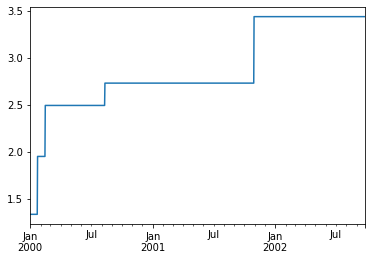

In [46]:
kser.plot()

On a DataFrame, the <a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.frame.DataFrame.plot.html#databricks.koalas.frame.DataFrame.plot">plot()</a> method is a convenience to plot all of the columns with labels:

In [47]:
pdf = pd.DataFrame(np.random.randn(1000, 4), index=pser.index,
                   columns=['A', 'B', 'C', 'D'])

In [48]:
kdf = ks.from_pandas(pdf)

In [49]:
kdf = kdf.cummax()

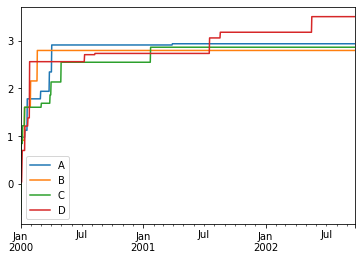

In [50]:
kdf.plot()

## Getting data in/out
See the <a href="https://koalas.readthedocs.io/en/latest/reference/io.html">Input/Output
</a> docs.

### CSV

CSV is straightforward and easy to use. See <a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.DataFrame.to_csv.html#databricks.koalas.DataFrame.to_csv">here</a> to write a CSV file and <a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.read_csv.html#databricks.koalas.read_csv">here</a> to read a CSV file.

In [51]:
kdf.to_csv('foo.csv')
ks.read_csv('foo.csv').head(10)

,A,B,C,D
0,0.976091,0.910572,-0.640756,0.034655
1,0.976091,0.910572,-0.150827,0.034655
2,0.976091,0.910572,0.796879,0.034655
3,0.976091,0.910572,0.849741,0.034655
4,0.976091,0.910572,0.849741,0.370709
5,0.976091,0.910572,0.849741,0.698402
6,0.976091,0.910572,1.217456,0.698402
7,0.976091,0.910572,1.217456,0.698402
8,0.976091,0.910572,1.217456,0.698402
9,0.976091,0.910572,1.217456,0.698402


### Parquet

Parquet is an efficient and compact file format to read and write faster. See <a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.DataFrame.to_parquet.html#databricks.koalas.DataFrame.to_parquet">here</a> to write a Parquet file and <a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.read_parquet.html#databricks.koalas.read_parquet">here</a> to read a Parquet file.

In [52]:
kdf.to_parquet('bar.parquet')
ks.read_parquet('bar.parquet').head(10)

,A,B,C,D
0,0.976091,0.910572,-0.640756,0.034655
1,0.976091,0.910572,-0.150827,0.034655
2,0.976091,0.910572,0.796879,0.034655
3,0.976091,0.910572,0.849741,0.034655
4,0.976091,0.910572,0.849741,0.370709
5,0.976091,0.910572,0.849741,0.698402
6,0.976091,0.910572,1.217456,0.698402
7,0.976091,0.910572,1.217456,0.698402
8,0.976091,0.910572,1.217456,0.698402
9,0.976091,0.910572,1.217456,0.698402


### Spark IO

In addition, Koalas fully support Spark's various datasources such as ORC and an external datasource.  See <a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.DataFrame.to_spark_io.html#databricks.koalas.DataFrame.to_spark_io">here</a> to write it to the specified datasource and <a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.read_spark_io.html#databricks.koalas.read_spark_io">here</a> to read it from the datasource.

In [53]:
kdf.to_spark_io('zoo.orc', format="orc")
ks.read_spark_io('zoo.orc', format="orc").head(10)

,A,B,C,D
0,0.976091,0.910572,-0.640756,0.034655
1,0.976091,0.910572,-0.150827,0.034655
2,0.976091,0.910572,0.796879,0.034655
3,0.976091,0.910572,0.849741,0.034655
4,0.976091,0.910572,0.849741,0.370709
5,0.976091,0.910572,0.849741,0.698402
6,0.976091,0.910572,1.217456,0.698402
7,0.976091,0.910572,1.217456,0.698402
8,0.976091,0.910572,1.217456,0.698402
9,0.976091,0.910572,1.217456,0.698402
